### Exercise 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [6]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.958041958041958

2) Repeat Step 1 using pipelines and report the score.

In [19]:
from sklearn.pipeline import Pipeline 
pipe = Pipeline([('scaler', MinMaxScaler()), ('KNeighbor', KNeighborsClassifier(n_neighbors=3))])
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.958041958041958

3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor. 

In [23]:
from sklearn.model_selection import GridSearchCV 
import numpy as np

param_grid = {'KNeighbor__n_neighbors': np.arange(1,30,2)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train,y_train)
print(grid.score(X_test,y_test))
print(grid.best_score_)
print(grid.best_params_)

0.965034965034965
0.9718715393133998
{'KNeighbor__n_neighbors': 7}


4)	Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

- Use `from sklearn.neighbors import KNeighborsRegressor'
- You need to split the data into X and y. 
- Check the data shape
- Check the data types
- Print the column names of the data frame
- Create a scatterplot of each feature against the target variable (you may use clues our previous labs to do that)
- Create alist of features that are numeric and not numeric
- Create a pipeline of imputer and standard scaler for the numeric features
- Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
- You can create your column transformer in different ways
- Finally create a pipeline of column transformer and kNeighborsRegressor
- Split your data into train and test datasets
- Report the score on the test dataset



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('bike_day_raw.csv')
df.head(10)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


In [29]:

df.shape, df.dtypes

((731, 11),
 season          int64
 mnth            int64
 holiday         int64
 weekday         int64
 workingday      int64
 weathersit      int64
 temp          float64
 atemp         float64
 hum           float64
 windspeed     float64
 cnt             int64
 dtype: object)

In [25]:
df.isna().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [27]:
df.columns
X = df.drop('cnt', axis=1)
y = df['cnt']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
X_train.shape, y_test.shape

((548, 10), (183,))

In [37]:
ax.ravel()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

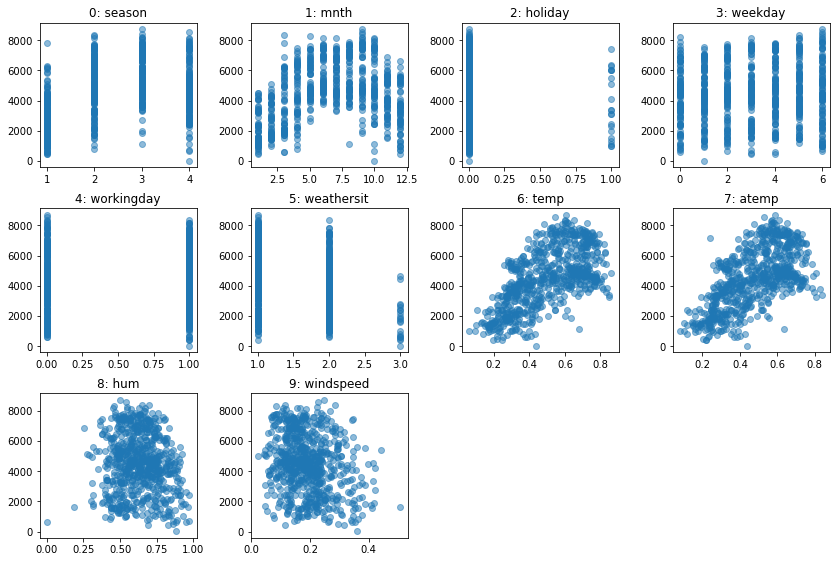

In [46]:
fig, ax = plt.subplots(3,4,figsize=(12,8))

plt.tight_layout(pad=2.0)
for i, a in enumerate(ax.ravel()):
    if i > 9:
        a.set_visible(False)
        continue
    a.plot(X.iloc[:,i], y, 'o', alpha=0.5)
    a.set_title(f'{i}: { X.columns[i]}')


In [52]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday',
                        'weekday', 'workingday', 'weathersit']


In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [55]:
preprocess1 = make_column_selector(make_pipeline(SimpleImputer(), StandardScaler(), numeric_features),
                     (OneHotEncoder(), categorical_features))

TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '['temp', 'atemp', 'hum', 'windspeed']' (type <class 'list'>) doesn't